# WELCOME TO ATTEMPT **3** of **"*THE MOST AUTISTIC THING I HAVE DONE, LIKE, EVER*"**

This is mostly attempt 2 again, **note to self, backups are not optional**.
The whole attempt 2/3 is due to v1's failings, but a bit of a recap first.

## Recap
This whole endevour is to check definitely how much time has passed in the webserial *"Wearing Power Armor to a Magic School"* written by **JCB112** (or `WPatMS` for short), the other goal is to predict in which chapter a *"communication deadline"* which happens 5 weeks after the beginning of the book.

Thanks to a **TON** of manual analysis we know that the book can't start any earier than 15:30 on the first day

## V1 Sucesses
As much as V1 was flawed from the start it did a bit of good:
1. **THE GRAPHS**, v1 gave us some very good graphs, even though they were a bit wonky in places *(the X-axis)*
2. It helped greately with the manual analysis
3. It proved that this way of parsing the timestamps can work

## V1 Problems
This is a bit easier than the above section:
1. The creation of html files and only then parsing them is a stupid idea. It would have some merit, if any changes would be made for these files, but such a thing was just not done
2. The jupyter notebook changed some variables in a cell, which did not have the definition, this made the code require a full restart on every run, as running it twice changed some variables
3. The code was not portable, the creation of the html files and the folders, required the use of some linux only commands, i want to change that by ... just not having any files saved
4. **THE GRAPHS™** all have a wonky x-axes, this is due to x being "event index" and not "chapter". This was easier, but it makes everything harder to understand

## V2 Failings
Ok this will be short. ***BACKUPS***.

So I opened a vscode server, connect to it from school (this is after *4 fucking days of coding*) **AND IT FUCKING DELETES THE WHOLE FUCKING FILE**

As to the fix, this is a git repo.

The second main failing was keeping the use of timestamps, and not just "minutes after midnight".

## V3 - Functional description

1. Parse the epub (it will be XHTML), as a list called `book` containing `chapters` that are a list of lines
2. Search for timestamps
3. Convert the timestamps to "minutes after midnight
4. Do some graphs
5. Find the amount of days that passed
6. Find the chapter, where the deadline passes

# Install of the required libraries
This code uses 2 libraries, namely [EbookLib](https://pypi.org/project/EbookLib/) and [matPlotLib](https://matplotlib.org/)

In [1]:
%%capture
# the %%capture thing makes the output supressed, on first run you might want to comment that out

# install the used libraries, thank god for FOSS
%pip install EbookLib
%pip install matplotlib

In [2]:
redditChapterText = """
 

Nexus. The Crown Herald Town of Elaseer. Ambassadorial District. The Adventurer’s Guild Hall… name pending. Local Time: 0700 Hours.

Emma

It shouldn’t have surprised me that our first major interaction in town had resulted in a standoff.

Though what did pleasantly surprise me was that unlike most of my confrontations up to this point, the point of contention between us didn’t involve a ticking time bomb nor an existential threat.

It instead involved… bread.

And pastries too.

Exactly ten trays of it to be precise.

With each tray somehow being comically larger than the next, managing to impress as equally as it did to impede what few pedestrians there were at this hour.

“Havenbrockian hospitality, was it, my lord?” The hooded figure spoke, his tone practically oozing a renewed sense of frustration and skepticism, clearly forming as a result of Ilunor’s premature bread stunt.

“Indeed it is.” Thalmin replied sternly, without once shifting his posture as he stood there with one arm still on the door. “Do you wish to reject the offer?” He quickly followed up, doubling down on the bread-ultimatum.

A small pause dominated the air after that point as I held my breath, my eyes gazing up to check my rear-view cameras for any potential crowds that had formed following this sudden buildup in bread-related traffic.

Thankfully, none had formed just yet.

Which once again showed that waking up early really did have its benefits.

“No, my lord. This was just… unexpected is all. Though you must forgive me, as practicality and tradition now stand in the way of the logistics of your kind and generous act of courtesy.” The man spoke cryptically, though it was clear that Thalmin’s refusal to back down, was enough to assuage his skepticisms somewhat. “You may wish to cover your ears for this.” He warned, turning around for a moment, before letting out an ear-splitting whistle.

No sooner did that whistle end, did a flurry of footsteps emerge from deep within the building, as a veritable platoon’s worth of haphazardly dressed elves, satyrs, serpent-people, and kobolds all came barreling out the door, standing at attention on the wide steps of the guild hall.

It was this latter group that reacted the most viscerally to our presence, or more particularly, Ilunor’s.

However, before the Vunerian could respond or acknowledge them in any way, another amongst their group started to take center stage.

One of them, a particularly scrawny-looking elf, took a few tentative steps up in front of the rank and file group; his head dipping mechanically before speaking. “What is your command, guild-commander, sir?”

“You lot finished training yet?” The hooded figure replied sternly, his tone of voice, and indeed his accent shifting drastically to something resembling a tired and nonplussed drill sergeant; a stark contrast to the more ‘proper’ voice he was using with us before.

“Yes sir!” The elf responded, gesturing to the rest of his group, all of whom were attempting to shuffle around what seemed to pass for uniforms; panting up a storm all the while. “Morning cleanup and maintenance work, along with preliminary training, complete sir!”

“Very good.” The guild commander replied with a single nod, before gesturing towards the line of bakers-turned-delivery men. “Bring those gifts inside, and set them in the Great Hall.” He commanded.

“Yes, sir!” Came the scrawny elf’s response, as a concerted, albeit somewhat chaotic effort, soon went underway.

Tray after tray were soon handed over to the ragtag group of… what I was starting to assume were trainee adventurers. Though their ages seemed to range wildly, with the oldest vaguely our age, and the youngest of which seemed way too young for a life of adventuring.

With his attention finally shifting away from the would-be adventurers, the hooded man turned to address us once more. “It is forbidden for any outsiders to enter the adventuring guild without permission. Especially those belonging to another guild or establishment within town.” The man explained.

“A good of a time as any to make use of squires and apprentices, then.” Thalmin surmised with a gravely huff.

“Indeed it is, your highness.” The man responded with a small dip of his head. “Once again, you must excuse our lack of formality. We certainly were not expecting a visitor this early, let alone royalty and nobility.”

“Formality is simply another form of discipline, guild-commander.” Thalmin responded in kind, stepping up to the plate with a demeanor I hadn’t seen from him before. His presence, his voice, even his gaze, shifted to a more commanding one. “To be frank, formality — especially of the variety you speak of — is much less impressive when compared to the discipline of a warrior. The latter of which, you seem to have no shortage of.”

This seemed to spark some change in the man, as he let out a gruff chuckle, before placing an arm across his chest and bowing deeply in the process. “You flatter me, Prince Havenbrock.” He began, but just as quickly gestured to the chaotic movements of the struggling group. “However, I truly cannot accept such a compliment, not with any ounce of earnestness at least. Because as you can see with your own two eyes, this lot of would-be apprentices have yet to have proven themselves in any meaningful capacity.”

“We all must start somewhere, guild-commander. Formality and decorum, swordsmanship and martial skills, all the hallmarks of a warrior or adventurer are learned traits. What cannot be learned or imparted however, is a willing steely spirit — one that seeks discipline and hierarchy. Your lot seems to have that going for them, and for me, that’s enough to warrant one round of flattery.”

The hooded man could only nod along as Thalmin spoke, but whilst his features were concealed, his body language more or less gave away much of his opinions on this whole back and forth.

“Spoken like a true mercenary prince, your highness.” He bowed deeper this time around, a sense of genuine appreciation coming through, just in time for the last of the bread trays to enter through the double-doors. With a cock of his head, momentarily halting the conversation to check up on the gaggle of trainees, he quickly turned to grab his side of the door, preparing to fully open it. “You, and your compatriots, are all welcome here.” The man extended his arm as far as it could go, pushing the door wide open in the process, and granting us a full view of the world within. “Welcome to the Adventurer’s Guild Hall of Elaseer.”

Thalmin wasted no time in entering, prompting the rest of us to follow closely in tow into a space that was as grand as it was on the inside, as the outside had led me to believe.

Grand pillars of geometrically shaped and carved oak dominated much of what looked to be an open-plan floor space, going up as high as to a second and third floor, both of which seemed to ‘wrap’ around the perimeter of the interior. This heavy usage of wood continued through to the simple wood-paneled walls, and was arguably put to exceptionally tasteful use on the floors. As all manner of hardwood planks ranging from pine to oak, to acacia and birch, covered the floor in a myriad of parquet patterns.

Immediately in front of us was a reception area, complete with sofas, lounge chairs, coffee tables, and all manner of tastefully placed decorations. All of which were more in line with a contemporary brand of posh aesthetics; not the overindulgent gaudy baroque aesthetics of the Academy or even the Versailles-themed bakery.

Immediately behind this reception lounge, was the actual reception desk, similar to what you’d expect to find in hotels and inns, wrapping around a large central pillar. Whilst unstaffed and seemingly empty like most of the room right now, there was no shortage of hints at just how busy this place got at its peak. With inkwells and quills, parchments and documents, all visibly present just behind the counter — as if placed there in anticipation of yet another busy day.

Flanking the reception counter at the entrance to the east and west ‘wings’ of the first floor were several large notice boards, some attached directly to the large support pillars, whilst others remained freestanding, set atop of easels and poster-stands.

The EVI quickly made short work of the more official looking notices, revealing that most were lists of active adventuring parties, timetables denoting shift rotation and questing availability, as well as public notices for either vacancies, advertisements of hire, and most interestingly of all — a call for intermediately-ranked adventuring parties to take on one of the ‘prospective apprentices’ for ‘field experience’.

However, the EVI’s technical hiccups soon reared its ugly head back around upon setting its sights on the less-than-official notices on the various adjacent noticeboards. A quick analysis revealed that these hiccups could simply be attributed to the occasional misspelling, the use of unconventional abbreviations, or even the excessive presence of technical jargon perhaps belonging to the niche field of adventuring.

Whatever the case was, my attention was quickly overtaken by the trail of trainees rapidly organizing the spoils of Ilunor’s spending spree in the west wing, as the doors to the massive hall remained wide open — revealing a room packed to the brim with long bench-style dining tables that stretched from wall to wall.

All manner of linen-lined baskets were set out throughout the tables, the trays of bread emptied into them at an exceptional rate.

Judging by the what was visible through the large shield-styled door, the west wing was dominated mostly by a communal dining area, complete with tapestries depicting grand battles lining every available wall, and suits of armor along with stereotypically shiny weapons hanging behind glass cases in between whatever spaces remained between the tapestries.

This room lacked the same warmth and luxury exuded by the reception area, as wood seemed to be used sparingly here, instead replaced by bog-standard cobblestone, brick, mortar, and harsher materials. Though, to their credit, most of the less tasteful construction was hidden quite effectively, giving off less of a medieval-utilitarian aesthetic, and more the vibe of a medieval monarch’s dining hall.

“I will be back shortly, my lords and ladies.” The hooded man announced, snapping me right out of my reverie. “I must inform the guild master of your arrival, and prepare them for your conference.”

“I hope this doesn’t take too long, guild-commander.” Thalmin responded calmly.

“I can assure that this will take no longer than a foam’s collapse, your highness.” The man bowed deeply, garnering a nod from Thalmin, before he promptly ran off up the stairs.

It was then that I started to notice something off about his legs, as a flicker of mana radiation coincided with a sudden, but recorded, instance of some disguise magic at play.

His legs were decidedly digitigrade, but then again, I wasn’t yet ready to openly question it.

What I would question, however, was that indecipherable idiom being used. “Thalmin, what exactly is a foam’s collapse?” I asked bluntly.

“It’s a commoner’s saying. The man’s clearly a lowborn.” Ilunor responded haughtily, lazing against the couch with an increasing display of gross superiority.

Thalmin, predictably, growled at this, before turning to me. “It’s a saying amongst warriors, Emma. It refers to the time it takes for a frothy mug of ale to go flat, or more specifically, the time it takes for a beer head to dissipate after standing for too long on the counter.”

“Huh.” I nodded once, as I quickly turned to the EVI. “Are you logging this, EVI?”

“Affirmative. New esoteric colloquialism added to the [Working Language Database].”

“Which I guess implies he won’t take long?” I clarified.

“Precisely, Emma.” Thalmin nodded.

Idle conversation quickly descended among the rest of the gang as I simply took in the sights and sounds, my eyes transfixed on the diligent and well-oiled machine of the trainees.

I was so enthralled by the atmosphere of this place, that I almost didn’t notice one of the trainees setting up a small tea set in front of us, as a five-tier tray was quickly set up, half of which were filled by the same pastries we brought in.

“Ugh.” Ilunor announced, garnering a quick snap of the trainee’s head, if only for the satyr to yelp meekly upon temporarily locking eyes with the Vunerian. “Regifting a gift is already an act of poor taste. To actually serve your guests their own gifts… is another thing entirely.” The blue thing spoke to no one in particular.

Though that little tirade was promptly interrupted by a sharp gurgling sound.

One that unmistakably came from someone’s stomach.

And given that none of us were hungry, the culprit of this was obvious enough, as I turned to face the trainee — a satyr that looked just about our age. The man was dressed in a simple set of clothes, consisting of a matching brown tunic and pants, which I assume was his PT uniform. Though not disheveled by any means, and clearly not starving, I couldn’t help but to sympathize with him.

So just as he’d finished setting up, I quickly called out for him. “Hey.” I began, reaching for one of the plates in the process. “You hungry?”

The trainee’s reaction… was something that I should’ve anticipated. As he turned to face me with a look of disbelief, before evolving into one of worry, as if expecting some sort of a reprimand.

“I… I’m sorry, my lady?” He stuttered out, nervousness seeping through each and every syllable.

“It’s a simple question, are you hungry or not? You just got out of morning exercises, right? I don’t imagine you’ve had time to eat.”

“Y-yes, my lady. Y-you’re correct.” He responded simply, bowing deeply between those two simple sentences.

“Then here.” I offered, extending the plate full of baked goods towards him. “Go for it.” I managed out with a smile, or at least, with an intonation that I hoped alluded to the smile beneath my helmet.

It was clear that this action garnered the attention of not only the rest of the gang, but also the other trainees who were watching this scene unfold.

“I… I cannot fathom taking—”

“Taking from guests? Well, just look at it this way. I’m not hungry anyways, so why let good food go to waste?” I countered, standing up, and more or less shoving the plate into the satyr’s hands.

A few moments of quiet contemplation followed as I could just about see the loading screen beach ball of death spinning within his dilated pupils.

With a gasp, and a deep bow, he relented. “T-thank you, my lady!” He stuttered out, as he made his way out of the reception area and back into the dining hall.

Chatter quickly erupted amongst the trainees, but before anything could be discerned, the hooded guild-commander quickly arrived back on scene.

“My sincerest apologies for having kept you waiting my lords and ladies.” He bowed deeply. “Please, the guild master is ready to receive you.”

With a wordless nod from Thalmin, and nary an acknowledgement from either Thacea or Ilunor, we left the reception, ascending the grand staircases, until we reached what was undeniably an elevator.

This was life-saving for Ilunor, who had already begun to show signs of strain as we’d ascended that first floor.

The rest of the trip was made in silence, as after navigating wood-paneled after wood-paneled corridor, passing by even more tapestries and artifacts encased in glass, we’d finally reached a hallway leading to a single door.

It was there that the guild commander simply stood back, allowing us to enter at our own pace.

Thalmin once more took the lead, knocking hard on the door, and prompting whoever was inside to respond muffledly. “Enter!”

With a single crank of the door handle, we arrived into an office that for once didn’t warp the fabric of space itself.

Indeed, the office’s design philosophy seemed to clash harshly with that of other Nexian seats of authority I’d seen thus far. Because as opposed to Mal’tory and the Dean’s obsession on monumentality and grandeur, this office seemed to embrace the same sort of subdued luxury as seen below in the reception area. As the warmth of the wood, and the lived-in feel of personal clutter ironically made this space feel more inherently magical than the cold authority of both of the former’s offices.

Though to be fair, that was probably what they were going for.

Aesthetics aside, it was clear that the ceilings in this space were heightened not merely for the aura of grandeur, but for utility’s purposes too.

This was because the being that stood before us, clad in plate armor sans their helmet, took up about a good twelve feet worth of height.

However, this would only be the beginning of the… peculiarities of the guild master.

“Ah! My fellows, please, allow me to make myself more presentable.” The being spoke with an almost otherworldly voice, something that felt artificial, strained, and forced.

However, instead of putting on his helmet as I’d expected him to, he began doing the complete opposite.

CLICK!

As he unlatched the straps of his chestplate—

THUNK**!**

—and allowed it to fall to the ground without a care in the world.

“Erm, we can return in a few moments if you’d like some time to—”

CLICK!

The porcelain-skinned humanoid continued unabated, his mechanically-jointed hands now reaching for his armored pants as they too—

THUNK**!**

—were removed in a single swift motion.

“AGHHHH!” Ilunor yelped out, shielding his eyes first.

So rapid-paced were the developments that even Thacea was left stunned, and Thalmin was left speechless.

This inexplicable turn of events eventually reached the height of its bizarreness the moment the guild master abruptly turned to face us however, as all of us rapidly went to shield our eyes… only to be met with what seemed to be a literal mannequin.

An oversized mannequin to be precise, complete with ball and socket joints, where traditional joints should have been; along with a painted-on face that felt more creepy than it did realistic.

“Whilst not required by law, I do wish to make it clear who you are speaking to.” The being continued, their ‘features’ completely motionless, as both of their hands reached up to their head…

POP!

… removing it entirely.

“I am Piamon the Dragon-slayer. Or, if you would prefer a more noble title, I am Third-Holder Piamon Pichun of the Pichun family, tenth of my name, and thirtieth in line for the Midland County of Lorlei. Current guild master of the Elaseer Adventuring Guild.” The… being… spoke in rapid succession, bowing deeply in the process, using their ‘head’ in the same way someone removing their hat would in an official greeting.

However, no sooner than my confusions had reached their precipice did they clear up, as a stream of iridescent light blue goop started to emerge from the mannequin’s neck-hole, forming into a ball, before dropping down with a solid plop on the desk in front of us.

“How may I be of service?” The… slime concluded.

That latent reflexive part of me flinched hard, as it took me a great deal of self control to not think of it as… well… another similarly slimy and gelatinous creature.

“You’re… a slime?” I managed out, attempting to assuage my anxieties, as well as to address my burning curiosities.

“A greater slime, yes.” The slime ‘nodded’ — an act that amounted to its ‘face’ dipping slightly ‘forwards’. A face that consisted of two thin gray lines for eyes, perpetually locked in an expressionless neutrality. “I assume you’re the newrealmer of the hour?”

“Indeed I am.” I replied with a nod of my own. “As such, I do apologize if that question was somewhat too blunt, or was in any way presumptuous.” I offered politely.

“No offense was taken, newrealmer. Ignorance is nothing to be sorry for.” The slime offered tactfully. “If anything, I would prefer that you ask any and all questions pertaining to my kind and my culture here, rather than receiving filtered and undoubtedly biased commentary from others.”

“Right.” I nodded, before turning to Thalmin who was clearly waiting for this back and forth to be over with.

However, once the shock of our introduction, and the relief from having the null question had passed, a new feeling quickly came to take its place.

One which was born out of the slime’s own self-admitted desire to set the record straight.

This was now a chance to interact with a truly alien being outside of the Academy’s walls; first contact without the overbearing flavor of the Academy’s meddling.

Questions began to flood my brain, as I could feel the second-hand excitement of the entirety of the sociology department’s staff flowing through my veins.

But while I had an infinite number of questions to ask, I still had a finite amount of time to work with.

And so, I had to choose my questions carefully.

Addressing the immediate circumstances was always a foolproof start to these sorts of things. I thought to myself.

Though questions like ‘what’s the difference between a greater and lesser slime’, whilst compelling, were probably best left for a trip to an encyclopedia.

Primary evidence was best collected on topics of first-hand accounts on culture after all.

Of which I had the perfect question for.

“You mentioned that revealing yourself is not required by law.” I began, much to Ilunor’s annoyance. “And you seem to have a very, very well crafted mannequin form at your disposal. I’m assuming that your primary slime form is something that isn’t very well received by socio-cultural norms? Or is your appearance somehow regulated by Nexian law?”

These questions seemed to elicit some form of a reaction from the slime, as its ‘skin’ jiggled with a level of what I assumed was intrigue.

“A perceptive newrealmer, I see.” The guildmaster spoke, before letting out a slight chuckle. “Indeed, I was referencing a few more well known limitations placed upon my kind by the likes of Nexian legal conventions.” They began, before moving off of the table, and ‘growing’ to meet my height. It took a solid half a minute, but standing before me, was a surprisingly realistic replica of my armor.

This… definitely started throwing me off, alarm bells practically blaring now, as the limits of my self-control were once more put to the test.

“The divulgence of my species, and indeed, the declaration of myself as a greater slime is only necessary if I were to publicly use my natural shapeshifting abilities.” They reasoned, even going so far as to mimic my voice, although they did so very poorly. Indeed, the more I looked, the more certain details of its mimicry were clearly flawed. From the off-blue color of the armor, to the mess of the UN emblem on the chestplate, everything just looked off after a few good hard seconds of scrutiny. “This is understandable, of course. As no one wishes to have their identity stolen. The result of this is the registration act, a means of registering known and unique forms into the crown registry, tying it to a greater slime’s identity, before making such a thing known to wherever a greater slime may reside. However, my kind have since eschewed frivolous and wanton shapeshifting, instead opting for the creation of static-forms, or mannequins as most elves call them.” The slime continued, quickly ‘melting’ away, before jumping next to the fallen mannequin heap, pointing at it for added effect.

“Greater slimes are in fact quite well known and well-regarded for this particular artform, Emma.” Thacea quickly added. “Indeed, you will find no other culture so well versed in the art of cosmetics; particularly in the crafting of mannequins.”

“You flatter us, my lady.” The slime offered with a deep nod. “Moreover, these mannequins are indeed quite useful for those among my kind that lack magical acumen, for they provide a static form that would otherwise be impossible to acquire without the natural gifts of magic.”

“It’s your highness, guildmaster.” Thalmin corrected. “This is Princess, Dilani.” He quickly added, before turning to the rest of us. “And this is Cadet Emma Booker of Earthrealm, along with Lord Ilunor Rularia.”

“Ah, an HRH. Duly noted, mercenary prince.” The slime noted, taking a deep bow towards Thacea and Ilunor, before turning back towards me. “Are there any further inquiries as to my kind, newrealmer?”

“I… think I might save that for another time then, probably after we conclude our business.” I conceded, moreso to Thalmin than the slime.

“Always a pleasure to discuss the truth of my kind. Though I do hope that my personality has not become as stilted as my porcelain exterior might otherwise lead you to think.”

“Not at all, Guildmaster Piamon Pichun. I appreciate your candor.” I dipped my head in acknowledgement.

“Now with all that being said—” Thalmin quickly chimed in. “—I would like to discuss our rather… atypical request.”

The guildmaster quickly returned to his former posture, ‘hopping’ back onto the table, and leaning forwards towards the lupinor. “Yes, mercenary prince?”

“I will be forthright in my request. I wish to issue a closed quest, to Wyvern-class adventurers and above, for the scouting, tracking, and reporting of the whereabouts of the Amethyst dragon.”

The guildmaster’s form jiggled once again in response to that.

“And would that be the very same Amethyst dragon that’s become the talk of the town as of late?” They inquired back.

“Yes.” Thalmin nodded. “Though I do stress, this is purely a scouting and reconnaissance mission, with all hazard pay included, along with a bonus for the quick and prompt delivery of said information.”

“And how much are you offering for this… atypical quest, mercenary prince?”

“Five thousand gold.” Thalmin stated plainly.

Though at this point, it was difficult to really discern a reaction from the slime given their lack of a face.

“Well thank goodness you specified this was merely a scouting mission, otherwise I would’ve denied such a request at such a measly price.” The slime responded, before reaching out a single ‘arm’ to rest its nonexistent ‘chin’ upon. “May I ask why you wish for such a quest?”

“A personal academic matter, guild master.” Thalmin responded bluntly.

“Alright then, shall I send someone to the Academy to verify these claims?” The slime rebutted.

“I’m afraid this form of academics is under a different authority.” I chimed in, pulling out a familiar card that immediately caught the attention of the slime; his whole body jostling uncontrollably in the process.

“Ah. I see.” The slime responded with a sly chuckle. “It’s been a long, long time since I’ve seen one of those.” They managed out through an excited breath. “Alright then… let’s discuss the terms.” 
"""

## Epub extraction
This cell extracts the `WPAtaMS.epub` file.

The code is a modified version of the example from [here](http://docs.sourcefabric.org/projects/ebooklib/en/latest/tutorial.html#reading-epub).

But `chapter.get_body_content()` gives a bytestring, so we change that to a utf-8 encoded string, and then split to lines

In [3]:
import ebooklib
from ebooklib import epub

bookFile = epub.read_epub("./WPAtaMS.epub")

book = []

for chapter in bookFile.get_items_of_type(ebooklib.ITEM_DOCUMENT):
    byteChapter = chapter.get_body_content()
    strChapter = str(byteChapter,'UTF-8')
    book.append(strChapter.split('\n'))

#chapter 0 and the last one are the ToC and the cover image respecly, let's detete them
book.pop(0)
book.pop(-1)

# The book starts at 1530 but that chapter does not have a timestamp, so we are going to add it
book[0].append("This is manually added TIME: 1530")

book.append(redditChapterText.split('\n'))

book[0][:5]

/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
/home/rim/Desktop/WPAtaMS-Analyzer/.venv/lib/python3.10/site-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


['',
 '  <h1>Chapter 1: Second Contact</h1>',
 '  <div class="chapter-inner chapter-content">',
 '                <p class=""><span style="font-weight: 400">There was a lot of fanfare that surrounded the first human to have made it to the Academy. Though it wasn’t because they were particularly well liked, or studious. Nor was it because they were in some way infamous or unsavory. In fact, they simply hadn’t had enough time to make an impact either way, as they’d emerged through the portal dead on arrival.</span></p>',
 '<p class=""><span style="font-weight: 400">It was a known fact that humans were just inherently magically-deficient. Their race was the last of the adjacent realms to have even detected the </span><em><span style="font-weight: 400">existence</span></em><span style="font-weight: 400"> of magic after all, let alone learning of the Nexus’ existence. What wasn’t expected however was just how truly deficient they actually </span><em><span style="font-weight: 400">were</span

## Parsing
To parse we first need to search for the timestamp, it is always given in either `hhmm` or `hh:mm` format. But always (excluding one time), the timestamp is preceeded at some point by the word `time`, in the same line, we will search for both.

The timestamp seach will be done using a regex, namely this one
```regex
   /([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]/
```

In [4]:
import re

def toMinutes(timestamp)->int:
    hours = int(timestamp[:2])
    minutes = int(timestamp[2:])
    return (60*hours)+minutes


timestamps = [] # this is an array of timestamps in the "minutes after midnight" format

for chapter in book:
    chTimestamps = []
    for line in chapter:
        if re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line) is not None:
            if line.upper().find("TIME:") != -1 or line.upper().find("HOURS") != -1:
                timestamp = re.search(r'([01][0-9]|2[0-3])[0-5][0-9]|([01][0-9]|2[0-3]):[0-5][0-9]',line)
                timestamp = timestamp.group().replace(':','')
                chTimestamps.append(toMinutes(timestamp))
    timestamps.append(chTimestamps)

timestamps[:5]

[[930], [], [], [], []]

## Plotting
We are back at the plots, *yay, it is not that i lost a week of work to  get back here* ... But now we use `minutesAfterMidnight` directly

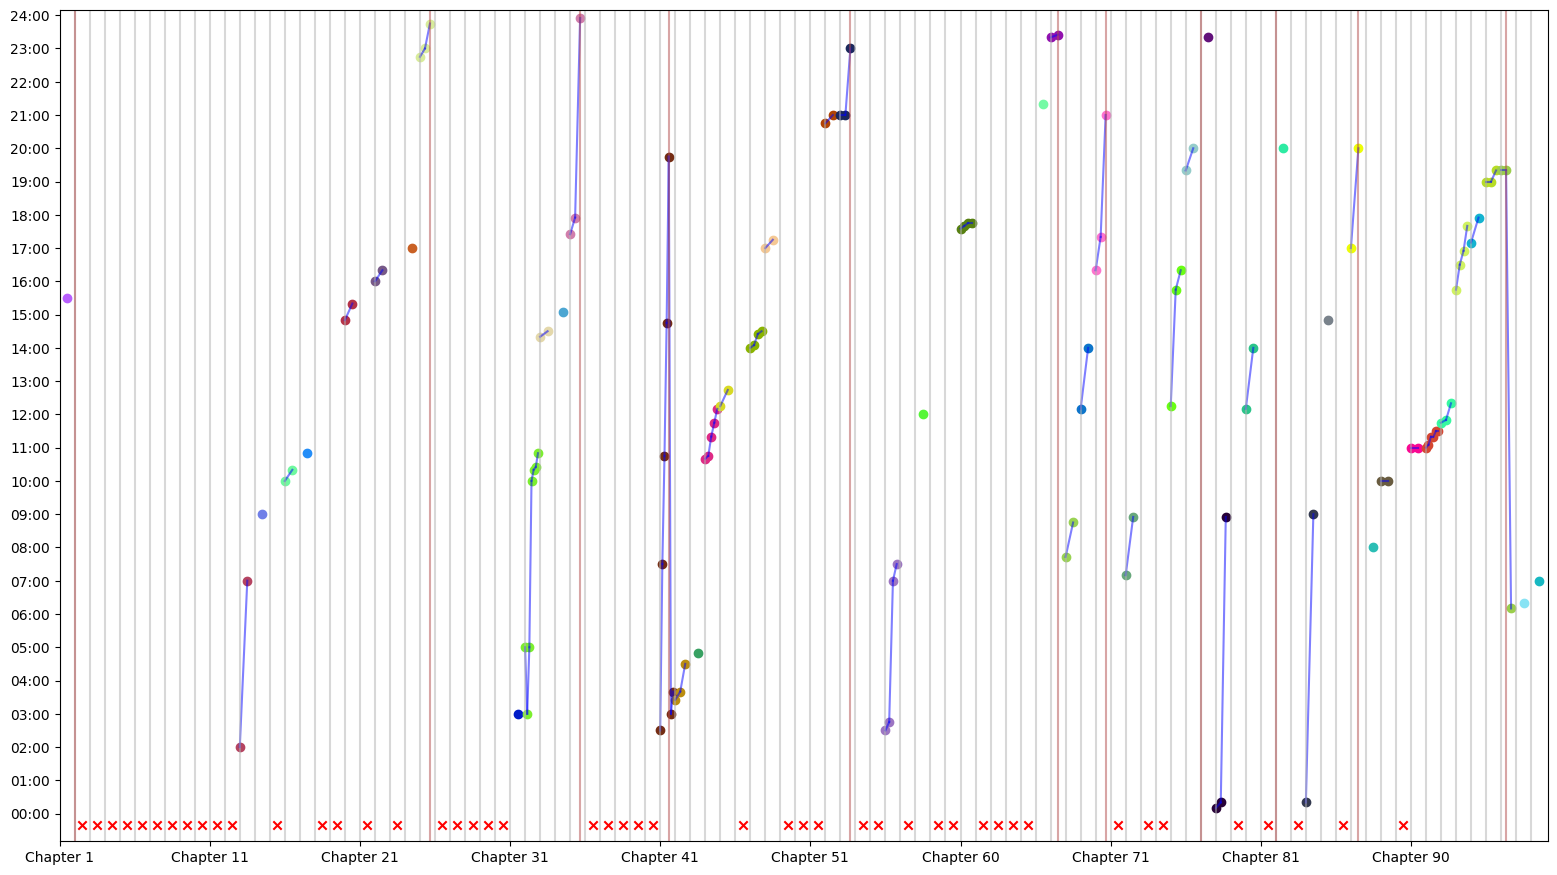

(None,
 11,
 [(1, 10.909090909090908),
  (31, 269.09090909090907),
  (41, 378.18181818181813),
  (41, 442.59740259740255),
  (56, 574.5454545454545),
  (68, 725.4545454545455),
  (72, 759.9999999999999),
  (78, 829.090909090909),
  (84, 883.6363636363636),
  (88, 943.6363636363636),
  (97, 1050.909090909091)])

In [5]:
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from random import random

fig = plt.figure(figsize=(19.2,10.8))
ax = fig.add_subplot(111)

fig = plt.gcf()
size = fig.get_size_inches()*fig.dpi

unit = size[1].item()/len(timestamps)
halfUnit = unit/2

datechanges = []

previousTimestamp = 24*60
previousPosition = unit


for chapterNumber,chapter in enumerate(timestamps):

    xStart = unit*chapterNumber
    xEnd = xStart+unit
    color = (random(),random(),random())

    if len(chapter) == 0:
        # print(chapterNumber)
        plt.scatter(xStart+halfUnit,-20,marker='x',color='red')
    elif len(chapter) == 1:
        plt.scatter(xStart+halfUnit,chapter[0],color=color)
    else:
        interUnit = unit/len(chapter)
        for timestampNumer,timestamp in enumerate(chapter):
            plt.scatter(xStart+(interUnit*timestampNumer),timestamp,color=color)

            # Line between timestamps in a chapter with more than 1 tmestamp
            # Well first if last chapter, do not draw a line
            if timestampNumer+1 != len(chapter):
                xPoses = [xStart+(interUnit*timestampNumer),xStart+(interUnit*(timestampNumer+1))]
                yPoses = [timestamp,chapter[timestampNumer+1]]
                plt.plot(xPoses, yPoses, c=(0,0,1,0.5))
            
for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit
    plt.axvline(xStart,color=(0.7,0.7,0.7,0.5))


for chapterNumber,chapter in enumerate(timestamps):
    xStart = unit*chapterNumber
    xEnd = xStart+unit

    # Because if the chapter does not chnage the time, it won't change the date
    if len(chapter) == 0:
        continue
    
    interUnit = unit/len(chapter)

    for timestampNumer,timestamp in enumerate(chapter):
        if previousTimestamp - timestamp > 120 and previousPosition != 0:
            datechanges.append((chapterNumber+1,previousPosition))
        previousTimestamp = timestamp
        previousPosition = xStart + (interUnit * timestampNumer)


for datechange in datechanges:
    plt.axvline(datechange[1],color=(0.7,0.3,0.3,0.5))
    pass


def minutes_to_hhmm(x,pos=0):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f'{hours:02d}:{minutes:02d}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))
ax.yaxis.set_major_locator(ticker.MultipleLocator(60))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'Chapter {int(x/unit)+1}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(unit*10))

plt.ylim(-50,60*24+10)
plt.xlim(left=0,right=unit*len(timestamps)+(unit/10))      

plt.show(),len(datechanges),datechanges

### I have checked the above plot, and made this table

| Day number | Chapters |                                                                                                        Description |
| :--------- | :------: | -----------------------------------------------------------------------------------------------------------------: |
| 1          |   1-12   |                                                                                            arrival and orientation |
| 2          |  13-31   |                                                 it ends at the weapon inspection, has the null fight and library 1 |
| 3          |  31-35   | food 1, grapple, aprentice, and jumping into the portal (note 35 does end exactly at midnight, which matches ch41) |
| 4          |  35-41   |     portal shenedigangs, bomb, etc (note ch41 has the whole, and is the only one thaat has timestamps for the day) |
| 5          |  41-55   |                                                               emma returns, letter, assembly, library 2, library 3 |
| 6          |  56-67   |                                                                                                      movie night 1 |
| 7          |  68-71   |                                                               Professor Vanavan's class, killing birds with Ilunor |
| 8          |  72-77   |                                                        Professor Articord's class, Assasination attempt at Thalmin |
| 9          |  78-84   |                                                 Larial Essen's / Sorecar's class, Mixer, Names of the burned books |
| 10         |  84-87   |                                                                           Professor Belnor's class, Dean Tea Party |
| 11         |  88-97   | Professor Chiska's class, first library checkup, planing for the trip, the cosmos (and Post Scarcity) discussion I |
| 12         |   97-    |                                                                                                    Trip to Elaseer |



## Analysis
Now that we have made **THE PLOT™** and **THE TABLE™**, we can go to the main course, the analysis of the chapter when the comunication deadline *(5 weeks)* ends.

We will use a few aproaches, but we will start with the simplest one ... just assume a constant speed, calculate the slope, and see where it crosses the 5 week line. 

In [6]:
fullDays = len(datechanges)-1 #it just works out this way, don't ask

firstDayOfset = 24*60 - timestamps[0][0] # this works out to 8 and a half hours

lastDayOfset = previousTimestamp # this is a bit harder, we do not know if the last chapter has a time .... but prevTimestamp has it, also conviniently this is in *"minutes after midnight"*

totalMinutesInBook = firstDayOfset+lastDayOfset+(fullDays*24*60)

# to check i asked wolframAlpha "15280 minutes = 10 days + 8.5 hours + 6 hours + 10 minutes" and it came out as "true"

decimalHoursInBook = totalMinutesInBook/60 # this is decimal hours
decimalDaysInBook = decimalHoursInBook/24 # this is decimal days

decimalDaysInBook,decimalHoursInBook,totalMinutesInBook

(10.645833333333334, 255.5, 15330)

In [7]:
daysInBook = decimalDaysInBook // 1
hoursInBook = (decimalHoursInBook - 24*daysInBook) // 1
minutesInBook = totalMinutesInBook - 60*24*daysInBook - 60*hoursInBook

currentTime = f"Day {daysInBook:.0f}, {hoursInBook:.0f}:{minutesInBook:.0f}"

currentTime

'Day 10, 15:30'

In [8]:
# Let's do a simple 2 point analysis of the timeframe to get the 5 week deadline's chapter


"""
current chapter number - decimalDaysInBook
            x          - 35 or 36
"""

# Assuming 35 days translates to a specific number of minutes:
day35Beginning = ((len(timestamps) + 1) * (35 * 24 * 60)) / totalMinutesInBook
day35T1530 = ((len(timestamps) + 1) * (((35 * 24 * 60) + (15 * 60) + 30))) / totalMinutesInBook  # 35 days + 15:30 (in minutes)
day35End = ((len(timestamps) + 1) * (((35 * 24 * 60) + (23 * 60) + 59))) / totalMinutesInBook  # End of 35th day (23:59)


print("# Time analysis:")
if len(timestamps[-1]) == 0:
    print("This chapter either does not appear to have any timestamps, the estimates will not be updated")
    print("It is equally probable that KekKom messsed up and the code AGAIN.")
    print("")
    print(f"The analysis below, will be using the data from: Chapter {next(i for i in reversed(range(len(timestamps))) if timestamps[i])+1}")
else:
    print("This chapter has a timestamp, so the estimates will be updated")

print("\n\n")
print("## Date and time")
print(currentTime)

print("\n\n")
print('## In which chapter will the "Communication deadline" pass')
print("The deadline is 5 weeks after arival, so there are three pssibilities:")
print(f"* If the deadline is at the beggining of day 35, then it would happen in chapter : {round(day35Beginning)}")
print(f"* If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : {round(day35T1530)}")
print(f"* If the deadline is at the end of day 35, then it would happen in chapter : {round(day35End)}")

# Time analysis:
This chapter has a timestamp, so the estimates will be updated



## Date and time
Day 10, 15:30



## In which chapter will the "Communication deadline" pass
The deadline is 5 weeks after arival, so there are three pssibilities:
* If the deadline is at the beggining of day 35, then it would happen in chapter : 329
* If the deadline is exactly 35 days after (ie. 15:30 on day 35), then it would happen in chapter : 335
* If the deadline is at the end of day 35, then it would happen in chapter : 338
